In [1]:
import pandas as pd
import eda_utils as utils
import prep_data_utils as prep
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('data/raw/train.csv')
data_df.head(15)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [3]:
utils.count_values(data_df, 'Response')

,Response,count,percentage
0,0,334399,87.74
1,1,46710,12.26


In [4]:
utils.count_nan(data_df)

,column,count,percentage
0,id,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Driving_License,0,0.0
4,Region_Code,0,0.0
5,Previously_Insured,0,0.0
6,Vehicle_Age,0,0.0
7,Vehicle_Damage,0,0.0
8,Annual_Premium,0,0.0
9,Policy_Sales_Channel,0,0.0


In [5]:
data_df.shape

(381109, 12)

<Figure size 432x288 with 0 Axes>

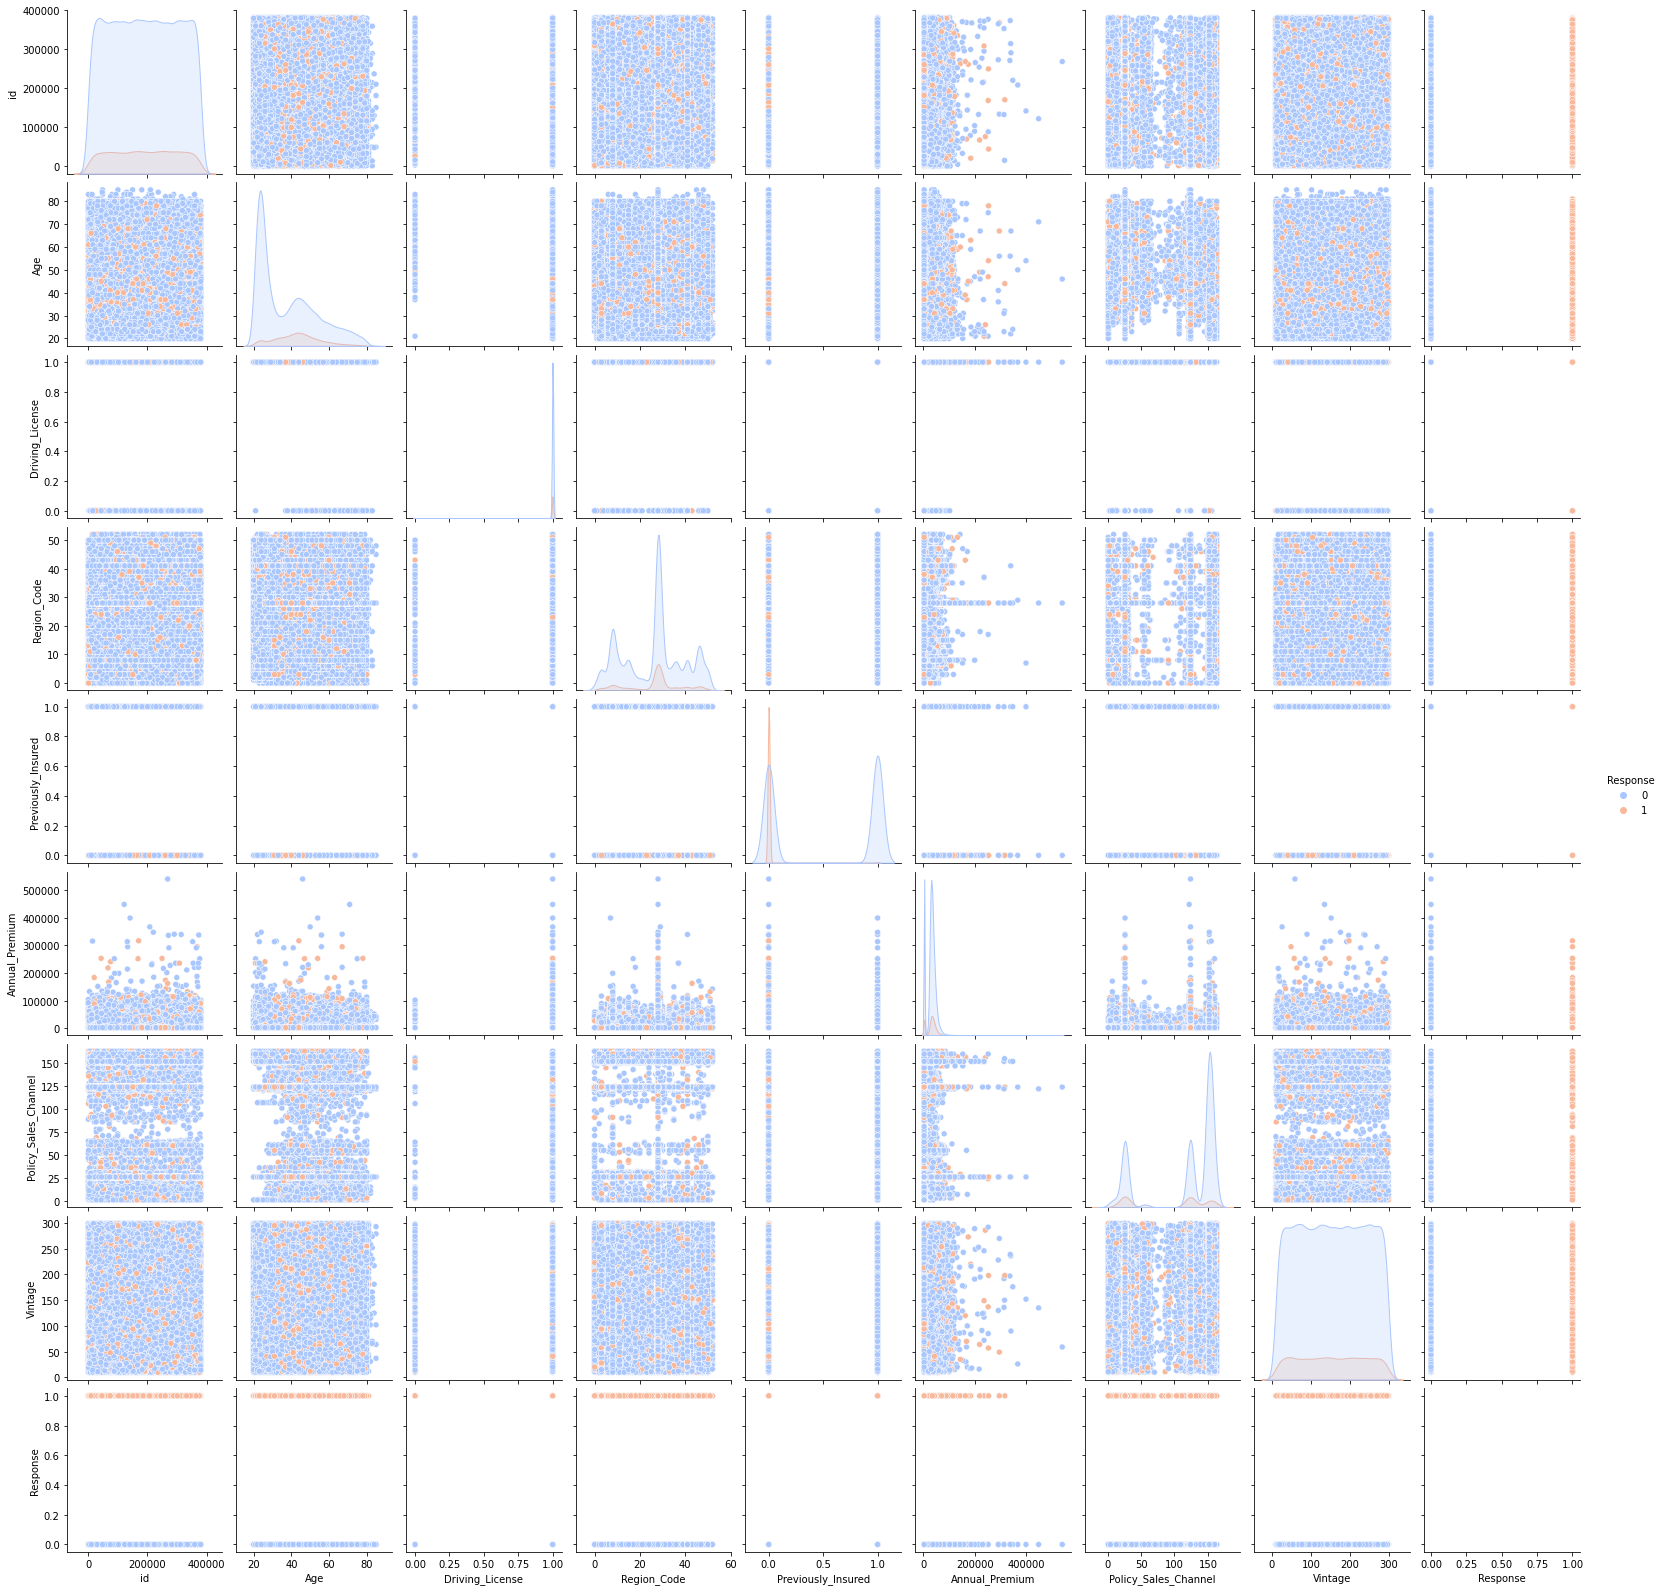

In [6]:
utils.show_pairplot(data_df, highest_only = True)

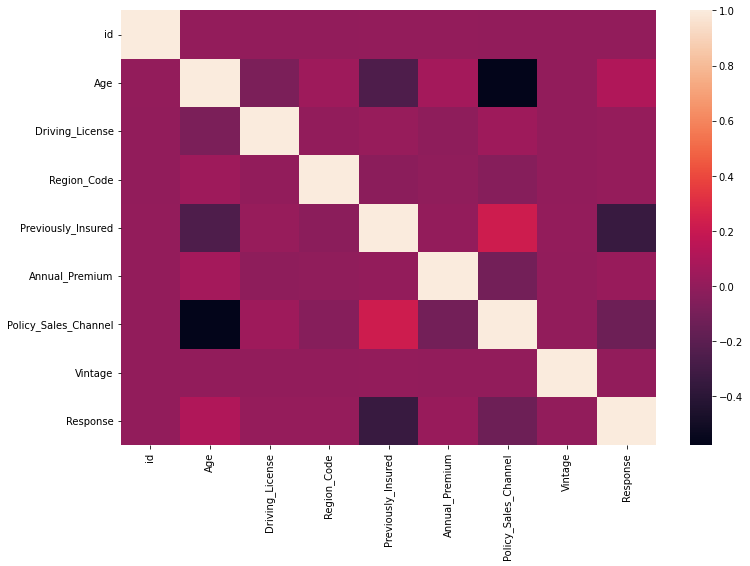

In [6]:
utils.show_heatmap(data_df)

In [7]:
data_df[['Age', 'Vintage', 'Annual_Premium']]

,Age,Vintage,Annual_Premium
0,44,217,40454.0
1,76,183,33536.0
2,47,27,38294.0
3,21,203,28619.0
4,29,39,27496.0
...,...,...,...
381104,74,88,30170.0
381105,30,131,40016.0
381106,21,161,35118.0
381107,68,74,44617.0


In [8]:
processed_df = prep.preprocess_data(data_df)
train_df, test_df = prep.split_train_test(processed_df)

In [ ]:
train_df.to_csv('data/processed/train.csv', index=False)
test_df.to_csv('data/processed/test.csv', index=False)

In [9]:
train_df = prep.scale_data(train_df, ['Age', 'Vintage', 'Annual_Premium'])
predict = utils.check_outlier(train_df, ['Age', 'Vintage', 'Annual_Premium'])

In [10]:
pd.DataFrame(predict).value_counts()

 1    301840
-1      3047
dtype: int64

Text(0.5, 0, 'Annual_Premium')

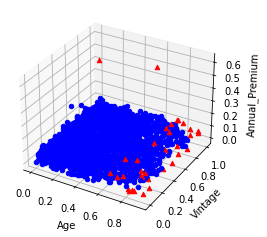

In [11]:
viz_df = train_df[['Age', 'Vintage', 'Annual_Premium']].copy()
viz_df['outlier'] = predict

small_df = viz_df.sample(frac=0.01, replace=False, random_state=42).reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(small_df)):
    if small_df.iloc[i]['outlier'] == 1:
        ax.scatter(small_df.iloc[i]['Age'], small_df.iloc[i]['Vintage'], small_df.iloc[i]['Annual_Premium'], marker='o', c = 'b')
    else:
        ax.scatter(small_df.iloc[i]['Age'], small_df.iloc[i]['Vintage'], small_df.iloc[i]['Annual_Premium'], marker='^', c = 'r')
# ax.scatter(small_df[['Age']], small_df[['Vintage']], small_df[['Annual_Premium']], marker = 'o')

ax.set_xlabel('Age')
ax.set_ylabel('Vintage')
ax.set_zlabel('Annual_Premium')
